In [1]:
# import important libraries
import pandas as pd
import matplotlib.pyplot as plt

# this line shows the plots
%matplotlib inline  

## Let's load in our data files!

In [2]:
# use the data panel on the right hand side to load the csv files

In [3]:
# alternatively, you can also load directly from the github repo
# us confirmed - https://raw.githubusercontent.com/lidderupk/covid-19-cali/master/data/johns_hopkins_csse/2019-novel-coronavirus-covid-19-2019-ncov-data-repository-confirmed-cases-in-the-us.csv
df_us_confirmed = pd.read_csv('https://raw.githubusercontent.com/lidderupk/covid-19-cali/master/data/johns_hopkins_csse/2019-novel-coronavirus-covid-19-2019-ncov-data-repository-confirmed-cases-in-the-us.csv')

In [4]:

#woh! that was smooth! Let's explore the dataset 
#how big is this dataset? shape returns a tuple. The first number is the number of rows and the second is the number of columns.
print(df_us_confirmed.shape)

print(f'\n\n{df_us_confirmed.shape[0]:,} rows!')

(240722, 13)


240,722 rows!


In [5]:
#what are the different columns in this dataframe
df_us_confirmed.columns

Index(['uid', 'iso2', 'iso3', 'code3', 'fips', 'admin2', 'province_state',
       'country_region', 'lat', 'long', 'combined_key', 'date', 'confirmed'],
      dtype='object')

In [6]:
#cool! What are some of the datatypes? Read object is mostly string
df_us_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240722 entries, 0 to 240721
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uid             240722 non-null  int64  
 1   iso2            240722 non-null  object 
 2   iso3            240722 non-null  object 
 3   code3           240722 non-null  int64  
 4   fips            240574 non-null  float64
 5   admin2          240204 non-null  object 
 6   province_state  240722 non-null  object 
 7   country_region  240722 non-null  object 
 8   lat             240722 non-null  float64
 9   long            240722 non-null  float64
 10  combined_key    240722 non-null  object 
 11  date            240722 non-null  object 
 12  confirmed       240722 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 23.9+ MB


In [7]:
#are there any null values? this takes a little time to go over 3.7M rows! Also only works for numerical data
df_us_confirmed.describe()

,uid,code3,fips,lat,long,confirmed
count,2.407220e+05,240722.000000,240574.000000,240722.000000,240722.000000,240722.000000
mean,8.390300e+07,839.444205,32090.929560,37.183790,-89.174224,8.838785
std,3.291996e+06,18.088415,17822.448519,8.621715,21.435389,312.321802
min,1.600000e+01,16.000000,60.000000,-14.271000,-170.132000,0.000000
25%,8.401904e+07,840.000000,19037.000000,34.237321,-98.037489,0.000000
50%,8.403005e+07,840.000000,30045.000000,38.147359,-89.825123,0.000000
75%,8.404701e+07,840.000000,47011.000000,41.684463,-82.793570,0.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,63306.000000


In [8]:
# hey! what about non numeric numbers? Can you figure this out?
pd.DataFrame.describe?

Signature:
pd.DataFrame.describe(
    self: ~FrameOrSeries,
    percentiles=None,
    include=None,
    exclude=None,
) -> ~FrameOrSeries
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be include

In [9]:
# answer
df_us_confirmed.describe(include='all')

,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
count,2.407220e+05,240722,240722,240722.000000,240574.000000,240204,240722,240722,240722.000000,240722.000000,240722,240722,240722.000000
unique,NaN,6,6,NaN,NaN,1893,58,1,NaN,NaN,3253,74,NaN
top,NaN,US,USA,NaN,NaN,Unassigned,Texas,US,NaN,NaN,"Panola, Mississippi, US",2020-03-23,NaN
freq,NaN,240352,240352,NaN,NaN,3774,18944,240722,NaN,NaN,74,3253,NaN
mean,8.390300e+07,NaN,NaN,839.444205,32090.929560,NaN,NaN,NaN,37.183790,-89.174224,NaN,NaN,8.838785
std,3.291996e+06,NaN,NaN,18.088415,17822.448519,NaN,NaN,NaN,8.621715,21.435389,NaN,NaN,312.321802
min,1.600000e+01,NaN,NaN,16.000000,60.000000,NaN,NaN,NaN,-14.271000,-170.132000,NaN,NaN,0.000000
25%,8.401904e+07,NaN,NaN,840.000000,19037.000000,NaN,NaN,NaN,34.237321,-98.037489,NaN,NaN,0.000000
50%,8.403005e+07,NaN,NaN,840.000000,30045.000000,NaN,NaN,NaN,38.147359,-89.825123,NaN,NaN,0.000000
75%,8.404701e+07,NaN,NaN,840.000000,47011.000000,NaN,NaN,NaN,41.684463,-82.793570,NaN,NaN,0.000000


## Query - does slicing work here? well YES!ing

In [10]:
#does slicing work here? well YES!
print('first 10 rows:')
df_us_confirmed[:10]

first 10 rows:


,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-22,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-23,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-24,0
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-25,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-26,0
5,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-27,0
6,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-28,0
7,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-29,0
8,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-30,0
9,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-31,0


In [11]:
print('last 10 rows:')
df_us_confirmed[-10:]

last 10 rows:


,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
240712,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-03-26,28
240713,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-03-27,28
240714,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-03-28,103
240715,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-03-29,103
240716,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-03-30,103
240717,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-03-31,103
240718,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-04-01,103
240719,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-04-02,103
240720,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-04-03,103
240721,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,"Grand Princess, US",2020-04-04,103


In [12]:
#cool deal, but there are other methods that are more popular to take a quick peek at the data
df_us_confirmed.head()

,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-22,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-23,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-24,0
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-25,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-26,0


In [13]:
# can anybody guess how to get the last 5?

In [14]:
# what about randomly selected sample data and why would you want to do that?
df_us_confirmed.sample()
df_us_confirmed.iso3.value_counts()

USA    240352
VIR        74
ASM        74
PRI        74
MNP        74
GUM        74
Name: iso3, dtype: int64

In [15]:
# what if want a random sample of 10, but be able to reproduce? use seed! Look up the syntax
df_us_confirmed.sample(10, random_state=19)

,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
22038,84008095,US,USA,840,8095.0,Phillips,Colorado,US,40.594143,-102.357770,"Phillips, Colorado, US",2020-03-22,0
66896,84020023,US,USA,840,20023.0,Cheyenne,Kansas,US,39.785810,-101.731820,"Cheyenne, Kansas, US",2020-01-22,0
96136,84026127,US,USA,840,26127.0,Oceana,Michigan,US,43.641244,-86.267267,"Oceana, Michigan, US",2020-02-01,0
185595,84047151,US,USA,840,47151.0,Scott,Tennessee,US,36.423257,-84.503605,"Scott, Tennessee, US",2020-01-25,0
21788,84008089,US,USA,840,8089.0,Otero,Colorado,US,37.901449,-103.717338,"Otero, Colorado, US",2020-02-23,0
179821,84046129,US,USA,840,46129.0,Walworth,South Dakota,US,45.430196,-100.030751,"Walworth, South Dakota, US",2020-01-23,0
232855,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",2020-03-13,0
191465,84048119,US,USA,840,48119.0,Delta,Texas,US,33.385709,-95.669211,"Delta, Texas, US",2020-02-18,0
91317,84025025,US,USA,840,25025.0,Suffolk,Massachusetts,US,42.327951,-71.078504,"Suffolk, Massachusetts, US",2020-01-23,0
227106,84055035,US,USA,840,55035.0,Eau Claire,Wisconsin,US,44.726614,-91.286092,"Eau Claire, Wisconsin, US",2020-01-22,0


### This all is great, but I want to get specific rows and columns. There are two very important methods to look up something in a dataframe

## loc and iloc

In [16]:
#loc is used to look up by label
#iloc is used to look up by index or location

In [17]:
#let's use iloc first. Get the first row with iloc. The general syntax for iloc is dataframe.iloc[rows,columns]
df_us_confirmed.iloc[0]

uid                               16
iso2                              AS
iso3                             ASM
code3                             16
fips                              60
admin2                           NaN
province_state        American Samoa
country_region                    US
lat                          -14.271
long                        -170.132
combined_key      American Samoa, US
date                      2020-01-22
confirmed                          0
Name: 0, dtype: object

In [18]:
#notice that returned a series. Another way to check is
type(df_us_confirmed.iloc[0])

pandas.core.series.Series

In [19]:
#now let's get the 5th and 6th rows. Remember numerical index is 0 based and also the second limit in the iloc index is excluded
df_us_confirmed.iloc[5:7]

,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
5,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-27,0
6,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-28,0


### Exercise 1

In [20]:
# great, can you get the 100th and 101th row using the iloc method?

In [21]:
# woh what kind of math is this!
print('-'*50)

--------------------------------------------------


In [22]:
# that's wonderful. How do we get only the columns we need using iloc? Let's say we only want title column for the 5th and 6th row
df_us_confirmed.iloc[5:7,0]

5    16
6    16
Name: uid, dtype: int64

In [23]:
#notice we again got a series. To get a dataframe, we can speficy a range as the second parameter for the columns.
df_us_confirmed.iloc[5:7, 0:5]

,uid,iso2,iso3,code3,fips
5,16,AS,ASM,16,60.0
6,16,AS,ASM,16,60.0


In [24]:
# What if we want admin2, province_state?
df_us_confirmed.iloc[5:7,5:7]

,admin2,province_state
5,NaN,American Samoa
6,NaN,American Samoa


In [25]:
#What if we want admin2, province_state and confirmed? Look at the docs again
df_us_confirmed.iloc[5:7,[5,6,7,12]]

,admin2,province_state,country_region,confirmed
5,NaN,American Samoa,US,0
6,NaN,American Samoa,US,0


### Exercise 2

In [26]:
#can you get admin2, province_state and confirmed cases for the 200th and 300th rows?

In [27]:
print('-'*50)

--------------------------------------------------


In [28]:
#let's try loc now. The general syntax remains the same dataframe.loc[rows,columns]. We now use labels instead of location or numerical index
#let's get the first row again
df_us_confirmed.loc[0]

uid                               16
iso2                              AS
iso3                             ASM
code3                             16
fips                              60
admin2                           NaN
province_state        American Samoa
country_region                    US
lat                          -14.271
long                        -170.132
combined_key      American Samoa, US
date                      2020-01-22
confirmed                          0
Name: 0, dtype: object

In [29]:
#woh! why did that work? It just so happens that in this case, the label or the index is the same as the numerical location
df_us_confirmed.index

RangeIndex(start=0, stop=240722, step=1)

In [30]:
#try it for the columns? It will give you an error. 
# df_us_confirmed.loc[0,0]

In [31]:
#now, let's get the state for the first two rows. notice in this case, the second argument is inclusive! Ya! Don't ask me why!
df_us_confirmed.loc[0:1,'province_state']

0    American Samoa
1    American Samoa
Name: province_state, dtype: object

### Exercise 3


In [32]:
# grab the 200th and 201st rows with admin2, province_state, country_region, and confirmed values

In [33]:
#also to note is that you can use dataframe[''] to select columns, but it is recommeneded to use the more explicit loc or iloc function
df_us_confirmed['province_state'].sample(5)

159283          Oklahoma
141497    North Carolina
211063          Virginia
52749            Indiana
92300           Michigan
Name: province_state, dtype: object

In [34]:
#that gave you a series. To get a dataframe, put another []
df_us_confirmed[['province_state']].sample(5)

,province_state
232486,Wyoming
93667,Michigan
214290,Virginia
184312,Tennessee
184257,Tennessee


In [35]:
#you can get multiple columns as follows
df_us_confirmed[['province_state', 'admin2']].sample(5)

,province_state,admin2
144801,North Carolina,Montgomery
2414,Alabama,Etowah
222709,West Virginia,Greenbrier
7038,Alaska,Skagway
236833,Diamond Princess,NaN


## Sorting

In [36]:
#use the sort_index method to sort the index
print('current index:', df_us_confirmed.index)

#let's change the index to year
df_us_confirmed_new = df_us_confirmed.set_index(df_us_confirmed.date)
print('new index:',df_us_confirmed_new.index)
#notice that it is not sorted

#sort_index
df_us_confirmed_new.sort_index().head()

current index: RangeIndex(start=0, stop=240722, step=1)
new index: Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04'],
      dtype='object', name='date', length=240722)


,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
date,,,,,,,,,,,,,
2020-01-22,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",2020-01-22,0
2020-01-22,84016021,US,USA,840,16021.0,Boundary,Idaho,US,48.766848,-116.463018,"Boundary, Idaho, US",2020-01-22,0
2020-01-22,84048289,US,USA,840,48289.0,Leon,Texas,US,31.298725,-95.993633,"Leon, Texas, US",2020-01-22,0
2020-01-22,84016019,US,USA,840,16019.0,Bonneville,Idaho,US,43.387134,-111.616154,"Bonneville, Idaho, US",2020-01-22,0
2020-01-22,84048291,US,USA,840,48291.0,Liberty,Texas,US,30.151527,-94.812056,"Liberty, Texas, US",2020-01-22,0


In [37]:
#to sort by value, you can use sort_values for dataframe
df_us_confirmed.head()

,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-22,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-23,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-24,0
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-25,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-26,0


In [38]:
df_us_confirmed.sort_values('combined_key').head()

,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
171754,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-01-22,0
171808,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-16,0
171807,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-15,0
171806,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-14,0
171805,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-13,0


## Exercise 4

In [39]:
# what if you want to sort by combined key followed by date?
# use df_us_confirmed.sort_values?

# df_us_confirmed.sort_values(['combined_key', 'confirmed']).head()

In [40]:
# what about sorting as before but show highest confirmed first?
df_us_confirmed.sort_values(['combined_key', 'confirmed'], ascending=[True, False]).head(20)



,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
171825,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-04-02,6
171826,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-04-03,6
171827,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-04-04,6
171819,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-27,4
171823,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-31,4
171824,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-04-01,4
171817,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-25,3
171818,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-26,3
171820,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-28,3
171821,84045001,US,USA,840,45001.0,Abbeville,South Carolina,US,34.223334,-82.461707,"Abbeville, South Carolina, US",2020-03-29,3


In [41]:
# Can you print out all the rows that have admin2 as null?
df_us_confirmed[df_us_confirmed.admin2.isnull()]


,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-22,0
1,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-23,0
2,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-24,0
3,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-25,0
4,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",2020-01-26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240717,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.000,0.000,"Grand Princess, US",2020-03-31,103
240718,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.000,0.000,"Grand Princess, US",2020-04-01,103
240719,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.000,0.000,"Grand Princess, US",2020-04-02,103
240720,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.000,0.000,"Grand Princess, US",2020-04-03,103


In [42]:
# Can you print out how many of each province_state have admin2 as null?
df_us_confirmed[df_us_confirmed.admin2.isnull()].province_state.value_counts()

Northern Mariana Islands    74
Virgin Islands              74
Grand Princess              74
Guam                        74
Puerto Rico                 74
Diamond Princess            74
American Samoa              74
Name: province_state, dtype: int64

In [43]:
#what is the syntax to sort a series? Look up the syntax here and complete the code below to print out all states in descending order...
#https://pandas.pydata.org/pandas-docs/stable/reference/series.html
states = df_us_confirmed.loc[:,'province_state']
print(type(states))

states.sort_values(ascending=False)

<class 'pandas.core.series.Series'>


231583    Wyoming
231913    Wyoming
231919    Wyoming
231918    Wyoming
231917    Wyoming
           ...   
3554      Alabama
3555      Alabama
3556      Alabama
3557      Alabama
3699      Alabama
Name: province_state, Length: 240722, dtype: object

## Conditional Lookups!

### Okay! so we know how to select based on position and index, but how do you do conditional lookups? Actually, this is fairly simple!

In [44]:
#let's get all California cases from April only
df_cali = df_us_confirmed.loc[df_us_confirmed.province_state == 'California']

In [45]:
# what is the dtype of the date column?
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4440 entries, 14134 to 237243
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uid             4440 non-null   int64  
 1   iso2            4440 non-null   object 
 2   iso3            4440 non-null   object 
 3   code3           4440 non-null   int64  
 4   fips            4440 non-null   float64
 5   admin2          4440 non-null   object 
 6   province_state  4440 non-null   object 
 7   country_region  4440 non-null   object 
 8   lat             4440 non-null   float64
 9   long            4440 non-null   float64
 10  combined_key    4440 non-null   object 
 11  date            4440 non-null   object 
 12  confirmed       4440 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 485.6+ KB


In [46]:
#first let's convert date type to date
df_cali.loc[:,'date'] = pd.to_datetime(df_cali.date)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4440 entries, 14134 to 237243
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             4440 non-null   int64         
 1   iso2            4440 non-null   object        
 2   iso3            4440 non-null   object        
 3   code3           4440 non-null   int64         
 4   fips            4440 non-null   float64       
 5   admin2          4440 non-null   object        
 6   province_state  4440 non-null   object        
 7   country_region  4440 non-null   object        
 8   lat             4440 non-null   float64       
 9   long            4440 non-null   float64       
 10  combined_key    4440 non-null   object        
 11  date            4440 non-null   datetime64[ns]
 12  confirmed       4440 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 485.6+ KB


In [48]:
# now let's get those cases for april only
after_april_filter = df_cali.date > '04.01.2020'
df_cali_april = df_cali[after_april_filter]

In [49]:
print(df_cali.shape)
print(df_cali_april.shape)

(4440, 13)
(180, 13)


In [50]:
# how much data do we have? What's the last date?
df_us_confirmed.date.value_counts().sort_index()
df_us_confirmed.date.max()
df_us_confirmed.date.min()
df_us_confirmed.date.sort_values()[-1:]

240721    2020-04-04
Name: date, dtype: object

In [51]:
#we can still use the second argument for loc to only get selected columns
df_cali.loc[after_april_filter ,['province_state', 'admin2', 'date', 'confirmed']].head()

,province_state,admin2,date,confirmed
14205,California,Alameda,2020-04-02,359
14206,California,Alameda,2020-04-03,443
14207,California,Alameda,2020-04-04,443
14279,California,Alpine,2020-04-02,1
14280,California,Alpine,2020-04-03,1


In [52]:
#we can use the shorter syntax as well and just do ...
df_cali[after_april_filter][['province_state', 'admin2', 'date', 'confirmed']].head()

,province_state,admin2,date,confirmed
14205,California,Alameda,2020-04-02,359
14206,California,Alameda,2020-04-03,443
14207,California,Alameda,2020-04-04,443
14279,California,Alpine,2020-04-02,1
14280,California,Alpine,2020-04-03,1


### The loc version seems easier to decipher! Note that you cannot do conditional selecting with iloc

## Exercise 5

In [53]:
#select all confirmed california cases for Feb and march. Remember the first parameter to loc can be a conditional (boolean)
march_april_filter = df_cali.date > '02.01.20' & df_cali.date < '03.31.20'


TypeError: unsupported operand type(s) for &: 'str' and 'DatetimeArray'

In [54]:
# oops, how do we fix that?
march_april_filter = (df_cali.date > '02.01.20') & (df_cali.date < '03.31.20')
df_cali[march_april_filter]

,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long,combined_key,date,confirmed
14145,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",2020-02-02,0
14146,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",2020-02-03,0
14147,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",2020-02-04,0
14148,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",2020-02-05,0
14149,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",2020-02-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237234,84090006,US,USA,840,90006.0,Unassigned,California,US,0.000000,0.000000,"Unassigned, California, US",2020-03-26,0
237235,84090006,US,USA,840,90006.0,Unassigned,California,US,0.000000,0.000000,"Unassigned, California, US",2020-03-27,12
237236,84090006,US,USA,840,90006.0,Unassigned,California,US,0.000000,0.000000,"Unassigned, California, US",2020-03-28,0
237237,84090006,US,USA,840,90006.0,Unassigned,California,US,0.000000,0.000000,"Unassigned, California, US",2020-03-29,0


## Exercise 6

In [55]:
#create a new dataframe with only california cases and another with only Oregon cases 

## What if you have a more complicated query? Get cases for all states that have the word 'south' in them

In [56]:
#you can use str on columns that are of object type and then perform any string operation on that column.
#for example to convert all titles to lowercase, we can do
print('original states in the dataframe:',df_us_confirmed.province_state.sample(5, random_state=19).values)

#use str.lower to lower case the series. Just showing the top 5.
df_us_confirmed.province_state.str.lower().sample(5, random_state=19).values


original states in the dataframe: ['Colorado' 'Kansas' 'Michigan' 'Tennessee' 'Colorado']


array(['colorado', 'kansas', 'michigan', 'tennessee', 'colorado'],
      dtype=object)

### See what else you can do with str here: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [57]:
#you can combine multiple str functions, but have to convert each sub step to str
#here, we first convert everything to lower case and then swapcase, that converts it back to upper case.
df_us_confirmed.province_state.str.lower().str.swapcase().sample(5, random_state=19)

22038      COLORADO
66896        KANSAS
96136      MICHIGAN
185595    TENNESSEE
21788      COLORADO
Name: province_state, dtype: object

## Exercise 7

In [58]:
# your turn with the original question.
# Get cases for all states that have the word 'south' in them
df_us_confirmed[df_us_confirmed.province_state.str.lower().str.contains('south')].province_state

171754    South Carolina
171755    South Carolina
171756    South Carolina
171757    South Carolina
171758    South Carolina
               ...      
239977      South Dakota
239978      South Dakota
239979      South Dakota
239980      South Dakota
239981      South Dakota
Name: province_state, Length: 8584, dtype: object

In [59]:
## Another very important method used all the time is value_counts()
df_confirmed_south = df_us_confirmed[df_us_confirmed.province_state.str.lower().str.contains('south')]
df_confirmed_south.province_state.value_counts()


South Dakota      5032
South Carolina    3552
Name: province_state, dtype: int64

## Charts and Plots!

In [60]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4440 entries, 14134 to 237243
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             4440 non-null   int64         
 1   iso2            4440 non-null   object        
 2   iso3            4440 non-null   object        
 3   code3           4440 non-null   int64         
 4   fips            4440 non-null   float64       
 5   admin2          4440 non-null   object        
 6   province_state  4440 non-null   object        
 7   country_region  4440 non-null   object        
 8   lat             4440 non-null   float64       
 9   long            4440 non-null   float64       
 10  combined_key    4440 non-null   object        
 11  date            4440 non-null   datetime64[ns]
 12  confirmed       4440 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 485.6+ KB


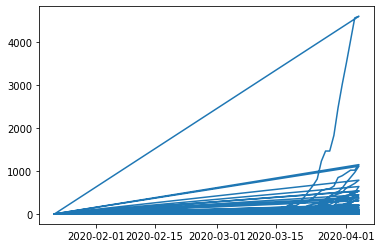

In [61]:
plt.plot(df_cali.date, df_cali.confirmed)

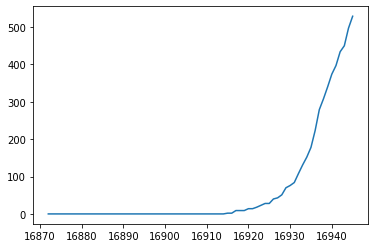

In [62]:
# San Francisco only
df_cali_sf = df_cali.loc[df_cali.admin2.str.lower().str.contains('francisco')] 
plt.plot(df_cali_sf.index, df_cali_sf.confirmed)

#why did that work? we did not use date!

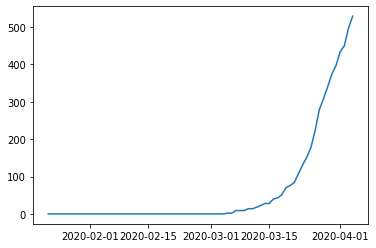

In [63]:
plt.plot(df_cali_sf.date, df_cali_sf.confirmed)

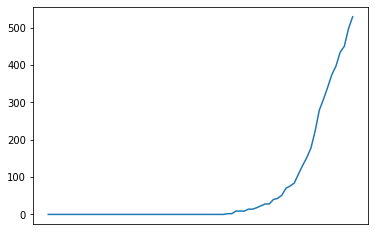

In [64]:
plt.xticks( df_cali_sf['confirmed'], df_cali_sf.date.values )
plt.plot( df_cali_sf['confirmed'] )
plt.show()

In [65]:
# can we compare different counties? How about Alamed and San Francisco?

In [66]:
df_cali_alameda = df_cali.loc[df_cali.admin2.str.lower().str.contains('alameda')] 

In [67]:
df_cali_alameda.admin2.value_counts()

Alameda    74
Name: admin2, dtype: int64

In [68]:
df_cali_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 16872 to 16945
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             74 non-null     int64         
 1   iso2            74 non-null     object        
 2   iso3            74 non-null     object        
 3   code3           74 non-null     int64         
 4   fips            74 non-null     float64       
 5   admin2          74 non-null     object        
 6   province_state  74 non-null     object        
 7   country_region  74 non-null     object        
 8   lat             74 non-null     float64       
 9   long            74 non-null     float64       
 10  combined_key    74 non-null     object        
 11  date            74 non-null     datetime64[ns]
 12  confirmed       74 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 8.1+ KB


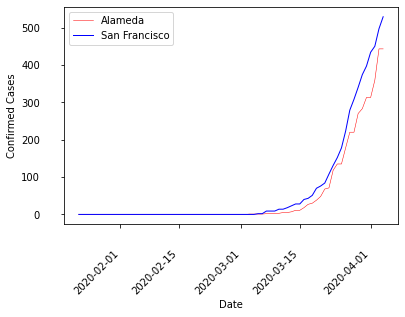

In [69]:
import matplotlib.dates as mdates
import matplotlib
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

ax = plt.gca()
ax.tick_params(pad=20)

plt.plot(df_cali_alameda.date, df_cali_alameda.confirmed, color='r', label='Alameda', linewidth=0.5)
plt.plot(df_cali_sf.date, df_cali_sf.confirmed, color='b', label='San Francisco', linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.legend(loc='best')

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.show() 

## Exercise 8

In [ ]:
# can you plot San Francisco and newyork from jan1 to apr1?
# df_nyc = df_cali.loc[df_cali.admin2.str.lower().str.contains('alameda')] 

In [ ]:
df_us_confirmed_not_null = df_us_confirmed[~df_us_confirmed.admin2.isnull()]
# note that the string function will fail on null values

df_nyc = df_us_confirmed_not_null[df_us_confirmed_not_null.admin2.str.lower().str.contains('new york')]

df_nyc.loc[:,'date'] = pd.to_datetime(df_nyc.date)

# df_nyc.set_index('date', inplace=True)

In [ ]:
import matplotlib.dates as mdates
import matplotlib
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter

ax = plt.gca()
ax.tick_params(pad=20)

plt.plot(df_nyc.date, df_nyc.confirmed, color='r', label='NYC', linewidth=0.5)
plt.plot(df_cali_sf.date, df_cali_sf.confirmed, color='b', label='San Francisco', linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
ax.legend(loc='best')

plt.ylim(0, 1000)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")


plt.show() 

In [ ]:
# groupby - a very powerful idea!

In [ ]:
df_cali.admin2.value_counts()

In [ ]:
# great, let's look at total cases per county
df_cali.groupby(['admin2', 'date'])[['confirmed']].sum().sort_index()

In [ ]:
df_us_confirmed.columns

In [ ]:
df_us_confirmed.groupby(['province_state', 'admin2'])[['confirmed']].mean().sort_values('confirmed', ascending=False)

In [ ]:
# combine everything. Average number of cases in sf by county
df_cali.groupby(['admin2'])[['confirmed']].mean().sort_values('confirmed', ascending=False)

